<a href="https://colab.research.google.com/github/Pramila15/Covid-19-prediction-using-Machine-Learning/blob/main/MDP_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import unittest


corona_data = pd.read_csv("corona_tested_individuals.csv")
df = pd.DataFrame(corona_data,columns=['cough','fever','sore_throat','shortness_of_breath','head_ache','corona_result'])

#splitting into x and y
y = df.pop('corona_result')
X = df
X.shape, y.shape

FileNotFoundError: ignored

# Preprocessing

In [ ]:
#Label encoding
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)
y_df =  pd.DataFrame(y,columns=['corona_result'])
y_df


,corona_result
0,0
1,0
2,0
3,0
4,0
...,...
278843,0
278844,0
278845,2
278846,1


#Splitting into train and test sets

In [ ]:
#splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y_df, test_size=0.25, random_state=0)
X_train = X_train.fillna(X_train.mean())
X_train

,cough,fever,sore_throat,shortness_of_breath,head_ache
101132,0,0,0,0,0
248238,0,0,0,0,0
227259,0,0,0,0,0
153806,1,1,1,0,1
188607,0,0,0,0,0
...,...,...,...,...,...
211543,0,0,0,0,0
86293,0,0,0,0,0
122579,0,0,0,0,0
152315,0,0,0,0,0


# Applying Logistic regression model

In [ ]:
#logistic regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

# Plotting confusion matrix and checking accuracy score

In [ ]:
# 0 - no #1 - yes
print("Self Validate Analysis")
namea = input("Name:")

cough_testa = input("Cough 0/1 -")
cough_testa=int(cough_testa)

sore_throat_testa = input("Sore throat 0/1 -")
sore_throat_testa=int(sore_throat_testa)

fever_testa = input("fever 0/1 -")
fever_testa=int(fever_testa)

shortness_of_breath_testa =input("Shortness of breath 0/1 -")
shortness_of_breath_testa=int(shortness_of_breath_testa)

head_ache_testa =input("Head ache 0/1 -")
head_ache_testa=int(head_ache_testa)

print("Person - ",namea)

test = [[cough_testa,sore_throat_testa,fever_testa,shortness_of_breath_testa,head_ache_testa]]
print(test)

y_pred = logistic_regression.predict_proba(test)
Probability=y_pred[[0]]
print("Probability of having corona",Probability[0][0]*100)
print("Probability of Not having Corona",Probability[0][1]*100)

Self Validate Analysis
Name:a
Cough 0/1 -0
Sore throat 0/1 -0
fever 0/1 -0
Shortness of breath 0/1 -0
Head ache 0/1 -0
Person -  a
[[0, 0, 0, 0, 0]]


NameError: ignored

[[64882     0   183]
 [  933     0    21]
 [ 2740     0   953]]


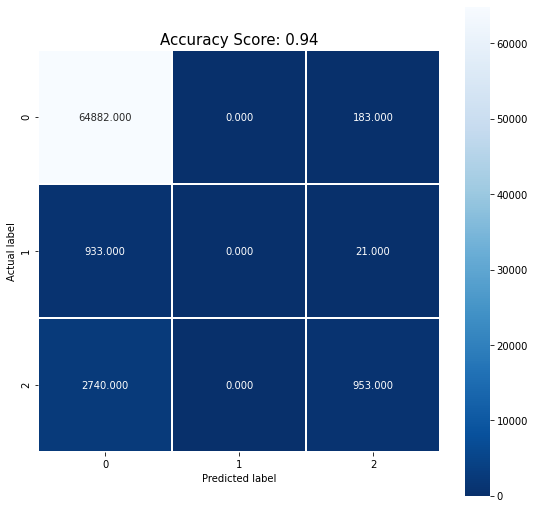

In [ ]:
plt.figure(figsize=(9,9))
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
score = metrics.accuracy_score(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: %.2f'% (score)
acc ='Accuracy Score: %.2f'% (score)
plt.title(all_sample_title, size = 15);

# Decision Tree classifier

In [ ]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

# Predicting the values of test data
y_pred = dtree.predict(X_test)

score = metrics.accuracy_score(y_test, y_pred)
accd = 'Accuracy Score: %.2f' % dtree.score(X_test, y_test)
print('Accuracy Score: %.2f' % dtree.score(X_test, y_test))

Decision Tree Classifier Created
Accuracy Score: 0.94


# Random forest classifier

In [ ]:
#RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)

from sklearn.ensemble import RandomForestClassifier
classifier =  RandomForestClassifier(n_estimators=15,max_features=3)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9443854716548084

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[64882,     0,   183],
       [  933,     0,    21],
       [ 2740,     0,   953]])

In [ ]:
Testcount = 0;
class TestAccuracy(unittest.TestCase):
    #Logistic Model Testing
    def test_logistic_acccuracy(self):
        print("Test Case Number: ", (Testcount+1))
        print("Test Case Name: Predicted Accuracy for logistic regression")
        self.assertEqual(acc,'Accuracy Score: 0.94',"Should be 94")

    def test_decision_accuracy(self):
        print("Test Case Number: ", (Testcount+2))
        print("Test Case Name: Predicted Accuracy for decision tree")
        self.assertEqual(accd,'Accuracy Score: %.2f' % dtree.score(X_test, y_test),"Should be 94")

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

..

Test Case Number:  2
Test Case Name: Predicted Accuracy for decision tree
Test Case Number:  1
Test Case Name: Predicted Accuracy for logistic regression



----------------------------------------------------------------------
Ran 2 tests in 0.017s

OK
